Analisis de datgos a las caciones mas sonasdas de spottify


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

In [ ]:
df=pd.read_csv('/content/Popular_Spotify_Songs.csv', encoding='latin-1')
df.head(2)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4


# Analysis to the Most popular Spotify songs data set downloaded on Keggel https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data

## Get to know the data

In [ ]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Streams, that is one of the most important columns is not type int, so we convert it, in order to be able to work with column

In [ ]:
#borrar linea sin numero de strams
df= df.drop(574, axis=0)

In [ ]:
df['streams']=df['streams'].astype(int)

Deletting the columns I do not want to have only the information I will use

In [ ]:
df.drop(df.columns[[6,7,9,10,11,12,13,15,16]],axis=1,inplace=True)
df.head(2)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,141381703,125,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,133716286,92,71,61,74,7,0,10,4


In this case, we want to pay attention to the most played songs and see if they share any characteristic

In [ ]:
df_mas_sonado=df.sort_values('streams',ascending=False).head(10)
df_mas_sonado

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,3703895074,171,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,3562543890,96,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,2887241814,110,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,2864791672,98,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,2808096550,90,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,2713922350,104,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,2665343922,170,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,2594040133,125,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,2591224264,95,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,2565529693,186,68,49,59,16,0,13,28


From this DF of popular songs from spotify, and we want to know:
1.   what is the top the 10 best songs
2.   What is the relationship between bpm, danceability, valence, energy, acousticness, instrumentalness and the most played songs
3.   If the year or date affects bpm, danceability, valence, energy, acousticness, instrumentalness
4.   When the mayority songs have been released, by year, month and day




1.   what is the top the 10 best songs

In [ ]:
df_mas_sonado

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,3703895074,171,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,3562543890,96,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,2887241814,110,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,2864791672,98,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,2808096550,90,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,2713922350,104,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,2665343922,170,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,2594040133,125,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,2591224264,95,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,2565529693,186,68,49,59,16,0,13,28


In [ ]:
df_mas_sonado=df_mas_sonado.reset_index(drop=True)
df_mas_sonado

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,3703895074,171,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,3562543890,96,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,2887241814,110,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,2864791672,98,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,2808096550,90,76,91,50,54,0,7,5
5,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,2713922350,104,77,36,63,1,0,36,5
6,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,2665343922,170,59,48,76,4,0,10,5
7,Believer,Imagine Dragons,1,2017,1,31,2594040133,125,77,74,78,4,0,23,11
8,Closer,"The Chainsmokers, Halsey",2,2016,5,31,2591224264,95,75,64,52,41,0,11,3
9,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,2565529693,186,68,49,59,16,0,13,28


2.   What is the relationship between bpm and the most played songs

In [ ]:
df_bpm=df_mas_sonado.sort_values('bpm',ascending=False)
df_bpm[['track_name','bpm','released_year']]

,track_name,bpm,released_year
9,Starboy,186,2016
0,Blinding Lights,171,2019
6,STAY (with Justin Bieber),170,2021
7,Believer,125,2017
2,Someone You Loved,110,2018
5,One Dance,104,2016
3,Dance Monkey,98,2019
1,Shape of You,96,2017
8,Closer,95,2016
4,Sunflower - Spider-Man: Into the Spider-Verse,90,2018


2.   What is the relationship between danceability and the most played songs

In [ ]:
df_danceability=df_mas_sonado.sort_values('danceability_%',ascending=False)
df_danceability[['track_name','danceability_%','released_year']]

,track_name,danceability_%,released_year
1,Shape of You,83,2017
3,Dance Monkey,82,2019
5,One Dance,77,2016
7,Believer,77,2017
4,Sunflower - Spider-Man: Into the Spider-Verse,76,2018
8,Closer,75,2016
9,Starboy,68,2016
6,STAY (with Justin Bieber),59,2021
0,Blinding Lights,50,2019
2,Someone You Loved,50,2018


2.   What is the relationship between valence and the most played songs

In [ ]:
df_valence=df_mas_sonado.sort_values('valence_%',ascending=False)
df_valence[['track_name','valence_%','released_year']]

,track_name,valence_%,released_year
1,Shape of You,93,2017
4,Sunflower - Spider-Man: Into the Spider-Verse,91,2018
7,Believer,74,2017
8,Closer,64,2016
3,Dance Monkey,54,2019
9,Starboy,49,2016
6,STAY (with Justin Bieber),48,2021
2,Someone You Loved,45,2018
0,Blinding Lights,38,2019
5,One Dance,36,2016


2.   What is the relationship between energy and the most played songs

In [ ]:
df_energy=df_mas_sonado.sort_values('energy_%',ascending=False)
df_energy[['track_name','energy_%','released_year']]

,track_name,energy_%,released_year
0,Blinding Lights,80,2019
7,Believer,78,2017
6,STAY (with Justin Bieber),76,2021
1,Shape of You,65,2017
5,One Dance,63,2016
3,Dance Monkey,59,2019
9,Starboy,59,2016
8,Closer,52,2016
4,Sunflower - Spider-Man: Into the Spider-Verse,50,2018
2,Someone You Loved,41,2018


2.   What is the relationship between acousticness and the most played songs

In [ ]:
df_acousticness=df_mas_sonado.sort_values('acousticness_%',ascending=False)
df_acousticness[['track_name','acousticness_%','released_year']]

,track_name,acousticness_%,released_year
2,Someone You Loved,75,2018
3,Dance Monkey,69,2019
1,Shape of You,58,2017
4,Sunflower - Spider-Man: Into the Spider-Verse,54,2018
8,Closer,41,2016
9,Starboy,16,2016
6,STAY (with Justin Bieber),4,2021
7,Believer,4,2017
5,One Dance,1,2016
0,Blinding Lights,0,2019


2.   What is the relationship between instrumentalness and the most played songs

In [ ]:
df_instrumentalness=df_mas_sonado.sort_values('instrumentalness_%',ascending=False)
df_instrumentalness[['track_name','instrumentalness_%','released_year']]

,track_name,instrumentalness_%,released_year
0,Blinding Lights,0,2019
1,Shape of You,0,2017
2,Someone You Loved,0,2018
3,Dance Monkey,0,2019
4,Sunflower - Spider-Man: Into the Spider-Verse,0,2018
5,One Dance,0,2016
6,STAY (with Justin Bieber),0,2021
7,Believer,0,2017
8,Closer,0,2016
9,Starboy,0,2016


3. Does the year or affects bpm, danceability, valence, energy, acousticness, instrumentalness

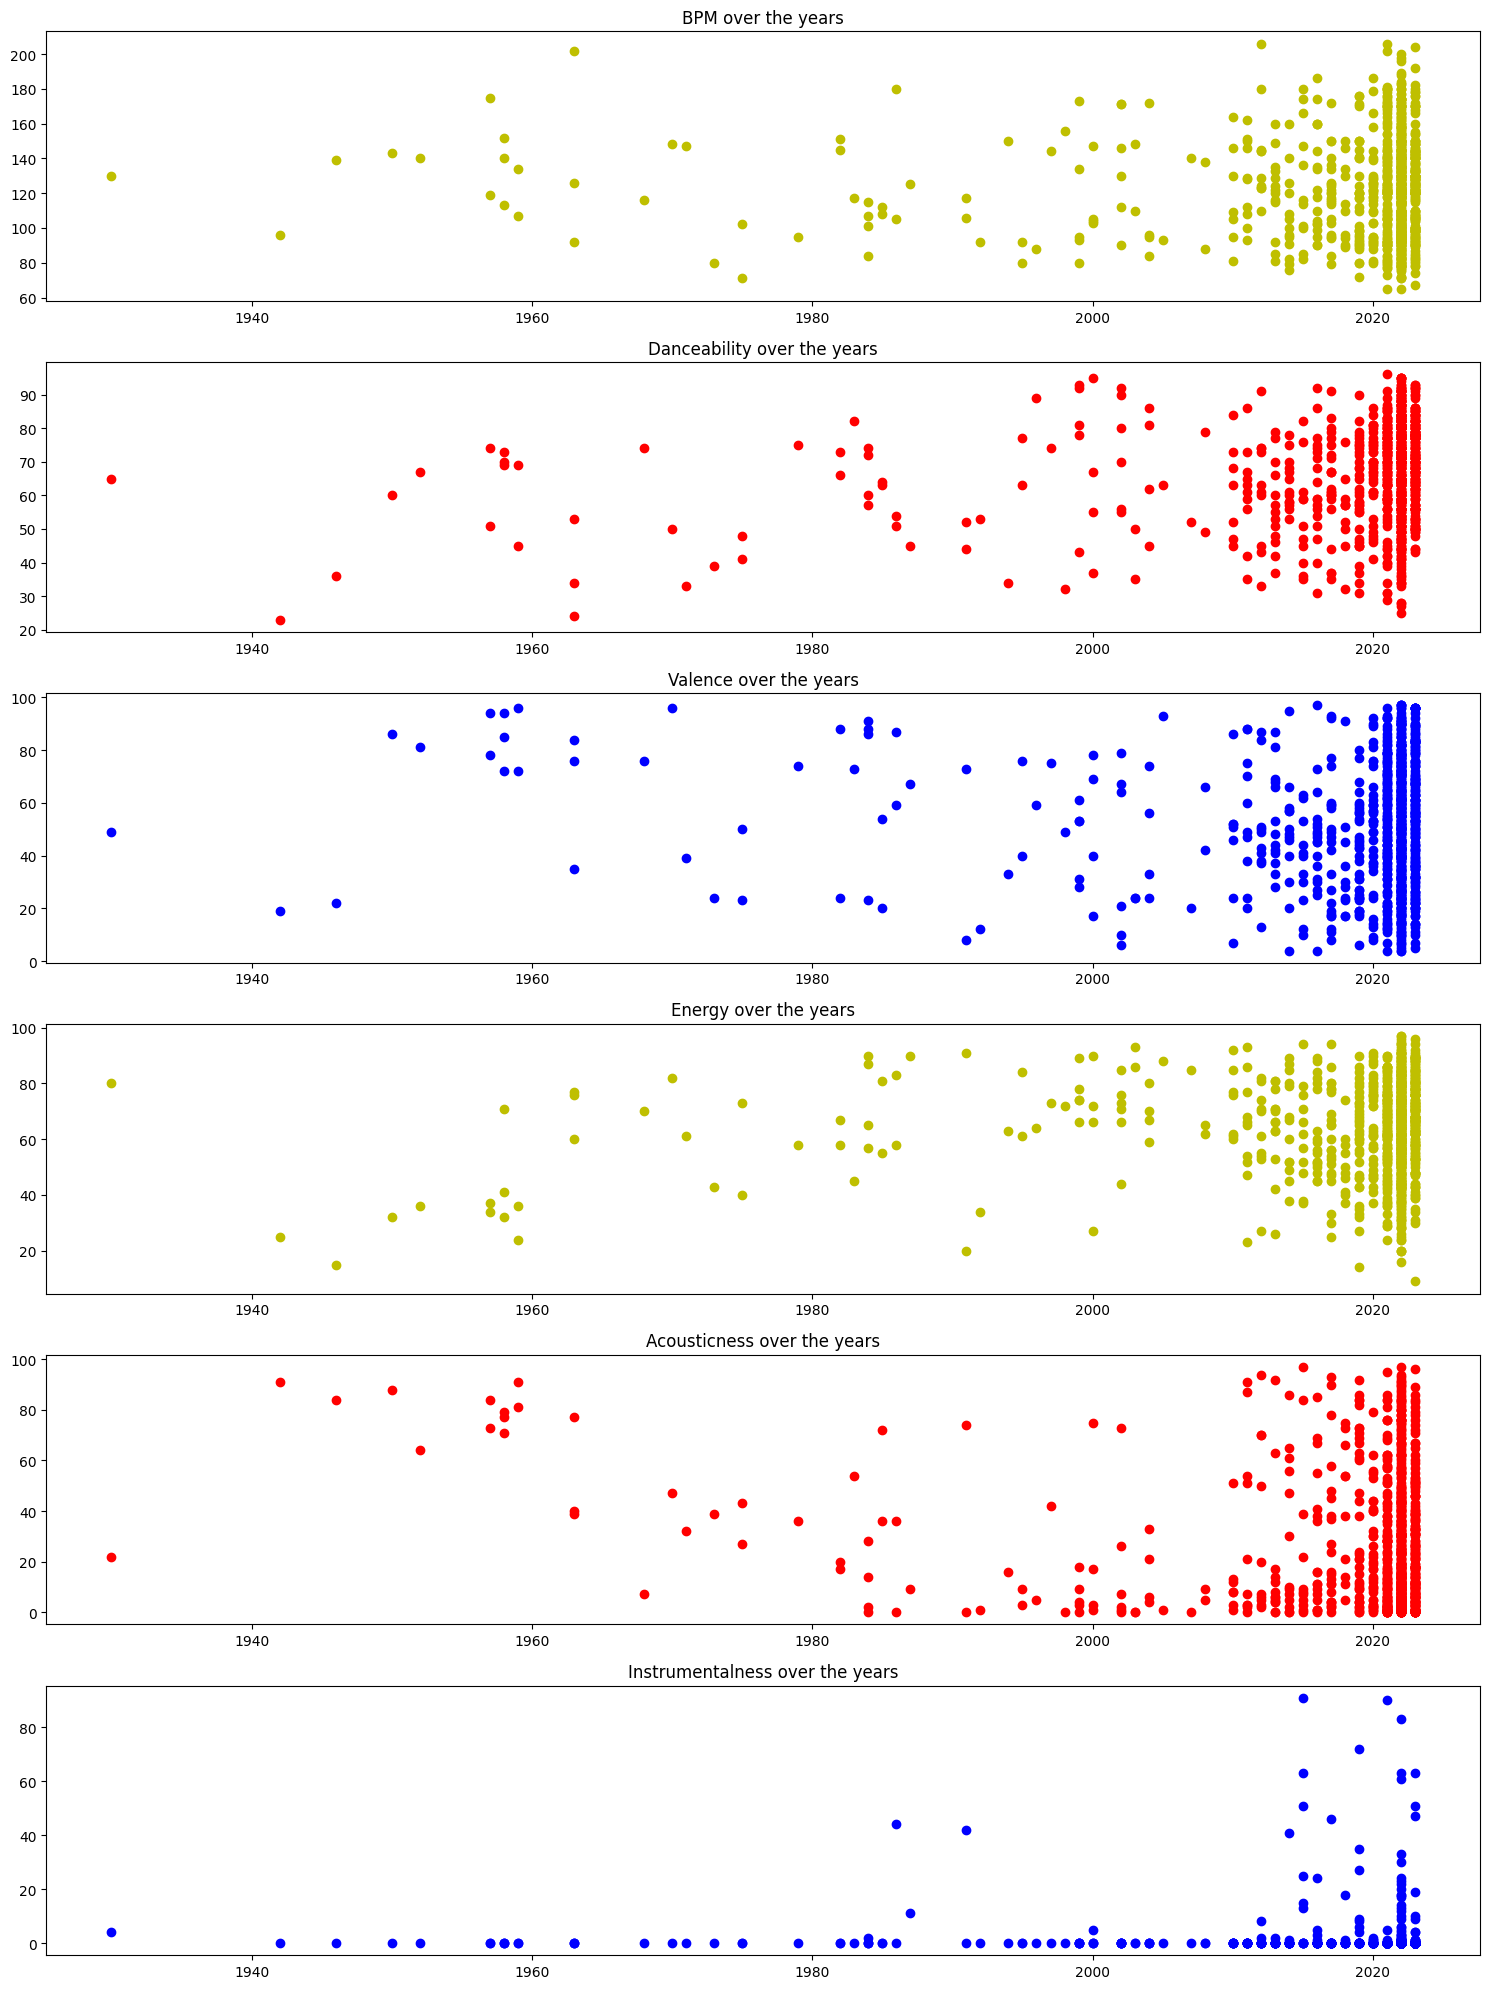

In [ ]:
x = df['released_year']
y1 = df['bpm']
y2 = df['danceability_%']
y3 = df['valence_%']
y4 = df['energy_%']
y5 = df['acousticness_%']
y6 = df['instrumentalness_%']

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20) )

axes[0].set_title('BPM over the years')
axes[0].plot(x,y1,'yo')

axes[1].set_title('Danceability over the years')
axes[1].plot(x,y2,'ro')

axes[2].set_title('Valence over the years')
axes[2].plot(x,y3,'bo')

axes[3].set_title('Energy over the years')
axes[3].plot(x,y4,'yo')

axes[4].set_title('Acousticness over the years')
axes[4].plot(x,y5,'ro')

axes[5].set_title('Instrumentalness over the years')
axes[5].plot(x,y6,'bo')
fig.tight_layout()

Now we will check what are the top 3 songs of the market depending on their characteristics

In [ ]:
df_mas_bpm=df.sort_values('bpm', ascending=False).head(3)
df_mas_bpm[['track_name','artist(s)_name','released_year','bpm']]

,track_name,artist(s)_name,released_year,bpm
506,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",2021,206
100,Lover,Taylor Swift,2012,206
28,Last Night,Morgan Wallen,2023,204


3. Top 3 of years with more bpm danceability



In [ ]:
df_mas_danceability=df.sort_values('danceability_%', ascending=False).head(3)
df_mas_danceability[['track_name','artist(s)_name','released_year','danceability_%']]

,track_name,artist(s)_name,released_year,danceability_%
595,Peru,"Ed Sheeran, Fireboy DML",2021,96
224,Players,Coi Leray,2022,95
250,The Real Slim Shady,Eminem,2000,95


3. If the year or date affects valence

In [ ]:
df_mas_valence=df.sort_values('valence_%', ascending=False).head(3)
df_mas_valence[['track_name','artist(s)_name','released_year','valence_%']]


,track_name,artist(s)_name,released_year,valence_%
418,Doja,Central Cee,2022,97
896,JGL,"Luis R Conriquez, La Adictiva",2022,97
861,En El Radio Un Cochinero,Victor Cibrian,2022,97


3. If the year or date affects energy

In [ ]:
df_mas_energy=df.sort_values('energy_%', ascending=False).head(3)
df_mas_energy[['track_name','artist(s)_name','released_year','energy_%']]

,track_name,artist(s)_name,released_year,energy_%
42,I'm Good (Blue),"Bebe Rexha, David Guetta",2022,97
319,Murder In My Mind,Kordhell,2022,97
795,That That (prod. & feat. SUGA of BTS),"PSY, Suga",2022,96


3. If the year or date affects acousticness

In [ ]:
df_mas_acousticness=df.sort_values('acousticness_%', ascending=False).head(3)
df_mas_acousticness[['track_name','artist(s)_name','released_year','acousticness_%']]

,track_name,artist(s)_name,released_year,acousticness_%
940,Sweet Nothing,Taylor Swift,2022,97
167,The Night We Met,Lord Huron,2015,97
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,2023,96


3. If the year or date affects instrumentalness

In [ ]:
df_mas_instrumentalness=df.sort_values('instrumentalness_%', ascending=False).head(3)
df_mas_instrumentalness[['track_name','artist(s)_name','released_year','instrumentalness_%']]


,track_name,artist(s)_name,released_year,instrumentalness_%
684,Alien Blues,Vundabar,2015,91
284,METAMORPHOSIS,INTERWORLD,2021,90
917,Poland,Lil Yachty,2022,83


4. When the mayority songs have been released, by year, month and day

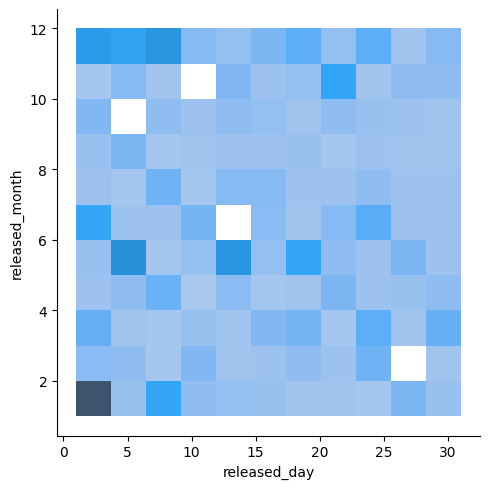

In [ ]:
sns.displot(data=df, x='released_day',y='released_month')
plt.show()

We can appreciate how the favorite day among all months to reseals new song is the first day of the real, with also lots of new songs by December